In [3]:
# -*- coding: utf-8 -*-

import torch
from kan import *
from kan.utils import create_dataset
from sympy import symbols
from kan.compiler import kanpiler
from kan.feynman import get_feynman_dataset
from kan.MLP import MLP
import matplotlib.pyplot as plt

In [4]:

# Set default precision and device
torch.set_default_dtype(torch.float64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


*EX1:KAN's interpretability*


>>> KAN可解释性示例：
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.91e-02 | test_loss: 1.86e-02 | reg: 5.76e+00 | : 100%|█| 50/50 [00:13<00:00,  3.71it


saving model version 0.1


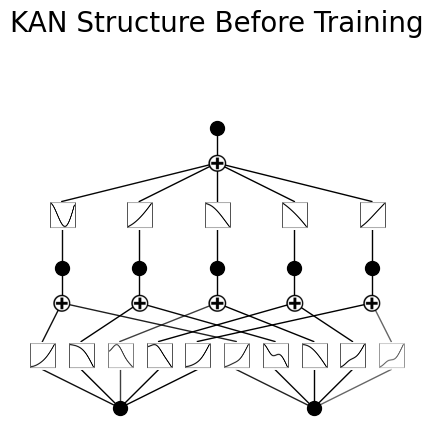

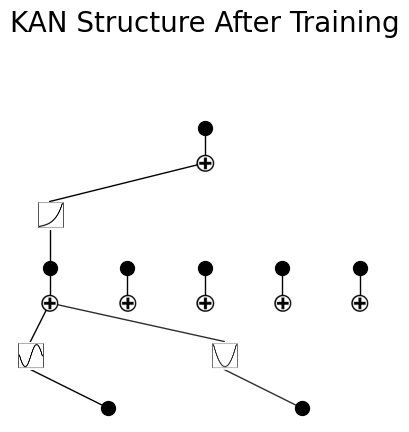

In [5]:

# 1. 可解释性示例
print("\n>>> KAN可解释性示例：")
f1 = lambda x: torch.exp(torch.sin(torch.pi * x[:,[0]]) + x[:,[1]]**2)
dataset1 = create_dataset(f1, n_var=2, device=device)
model1 = KAN(width=[2, 5, 1], grid=3, k=3, seed=42, device=device)
model1(dataset1['train_input'])  # 初始化状态
model1.plot(title="KAN Structure Before Training")
model1.fit(dataset1, opt="LBFGS", steps=50, lamb=0.001)
model1.plot(title="KAN Structure After Training")



*EX2:Comparison between KAN and MLP given same para setting: sample and more samples*

In [6]:
# 2. 与MLP对比
print("\n>>> KAN vs. MLP：")
mlp1 = MLP(width=[2, 5, 1]).to(device)
loss_fn = torch.nn.MSELoss()
opt = torch.optim.Adam(mlp1.parameters(), lr=1e-3)

for epoch in range(2000):
    mlp1.train()
    opt.zero_grad()
    pred = mlp1(dataset1['train_input'])
    loss = loss_fn(pred, dataset1['train_label'])
    loss.backward()
    opt.step()

# 评估 RMSE
mlp1.eval()
with torch.no_grad():
    pred_kan = model1(dataset1['test_input'])
    pred_mlp = mlp1(dataset1['test_input'])
    rmse_kan = torch.sqrt(torch.mean((pred_kan - dataset1['test_label'])**2)).item()
    rmse_mlp = torch.sqrt(torch.mean((pred_mlp - dataset1['test_label'])**2)).item()
    print(f"RMSE (KAN): {rmse_kan:.4f}")
    print(f"RMSE (MLP): {rmse_mlp:.4f}")



>>> KAN vs. MLP：
RMSE (KAN): 0.0186
RMSE (MLP): 0.9031



>>> Feynman 方程拟合对比（自动遍历所有可用问题）

=== Problem 1 ===
表达式: sqrt(2)*exp(-theta**2/2)/(2*sqrt(pi))
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.15e-02 | test_loss: 1.14e-02 | reg: 1.02e+01 | : 100%|█| 1/1 [00:00<00:00,  2.60it/s


saving model version 0.1


| train_loss: 9.35e-03 | test_loss: 9.76e-03 | reg: 9.05e+00 | : 100%|█| 1/1 [00:00<00:00,  3.52it/s


saving model version 0.2


| train_loss: 6.85e-03 | test_loss: 6.79e-03 | reg: 8.67e+00 | : 100%|█| 1/1 [00:00<00:00,  3.49it/s


saving model version 0.3


| train_loss: 5.32e-03 | test_loss: 5.56e-03 | reg: 7.68e+00 | : 100%|█| 1/1 [00:00<00:00,  3.73it/s


saving model version 0.4


| train_loss: 8.05e-03 | test_loss: 8.14e-03 | reg: 7.45e+00 | : 100%|█| 1/1 [00:00<00:00,  3.56it/s


saving model version 0.5


| train_loss: 6.67e-03 | test_loss: 6.90e-03 | reg: 7.35e+00 | : 100%|█| 1/1 [00:00<00:00,  3.43it/s


saving model version 0.6


| train_loss: 6.59e-03 | test_loss: 6.78e-03 | reg: 7.32e+00 | : 100%|█| 1/1 [00:00<00:00,  3.34it/s


saving model version 0.7


| train_loss: 6.83e-03 | test_loss: 6.68e-03 | reg: 7.23e+00 | : 100%|█| 1/1 [00:00<00:00,  3.36it/s


saving model version 0.8


| train_loss: 6.15e-03 | test_loss: 6.36e-03 | reg: 7.01e+00 | : 100%|█| 1/1 [00:00<00:00,  3.57it/s


saving model version 0.9


| train_loss: 6.40e-03 | test_loss: 6.40e-03 | reg: 6.90e+00 | : 100%|█| 1/1 [00:00<00:00,  3.47it/s


saving model version 0.10


| train_loss: 5.84e-03 | test_loss: 5.99e-03 | reg: 6.84e+00 | : 100%|█| 1/1 [00:00<00:00,  3.41it/s


saving model version 0.11


| train_loss: 5.90e-03 | test_loss: 6.05e-03 | reg: 6.81e+00 | : 100%|█| 1/1 [00:00<00:00,  3.53it/s


saving model version 0.12


| train_loss: 5.89e-03 | test_loss: 6.04e-03 | reg: 6.80e+00 | : 100%|█| 1/1 [00:00<00:00,  3.56it/s


saving model version 0.13


| train_loss: 5.90e-03 | test_loss: 6.04e-03 | reg: 6.79e+00 | : 100%|█| 1/1 [00:00<00:00,  3.52it/s


saving model version 0.14


| train_loss: 5.90e-03 | test_loss: 6.04e-03 | reg: 6.78e+00 | : 100%|█| 1/1 [00:00<00:00,  3.66it/s


saving model version 0.15
KAN RMSE: 0.0000 | MLP RMSE: 0.0007

=== Problem 2 ===
表达式: sqrt(2)*exp(-theta**2/(2*sigma**2))/(2*sqrt(pi)*sqrt(sigma**2))
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.19e-02 | test_loss: 2.32e-02 | reg: 1.27e+01 | : 100%|█| 1/1 [00:00<00:00,  3.10it/s


saving model version 0.1


| train_loss: 2.03e-02 | test_loss: 2.25e-02 | reg: 1.01e+01 | : 100%|█| 1/1 [00:00<00:00,  3.55it/s


saving model version 0.2


| train_loss: 2.23e-02 | test_loss: 2.35e-02 | reg: 8.91e+00 | : 100%|█| 1/1 [00:00<00:00,  3.46it/s


saving model version 0.3


| train_loss: 2.15e-02 | test_loss: 2.33e-02 | reg: 8.34e+00 | : 100%|█| 1/1 [00:00<00:00,  3.46it/s


saving model version 0.4


| train_loss: 2.43e-02 | test_loss: 2.50e-02 | reg: 7.53e+00 | : 100%|█| 1/1 [00:00<00:00,  3.48it/s


saving model version 0.5


| train_loss: 2.33e-02 | test_loss: 2.44e-02 | reg: 6.93e+00 | : 100%|█| 1/1 [00:00<00:00,  3.36it/s


saving model version 0.6


| train_loss: 2.29e-02 | test_loss: 2.37e-02 | reg: 6.66e+00 | : 100%|█| 1/1 [00:00<00:00,  3.58it/s


saving model version 0.7


| train_loss: 2.25e-02 | test_loss: 2.34e-02 | reg: 6.47e+00 | : 100%|█| 1/1 [00:00<00:00,  3.57it/s


saving model version 0.8


| train_loss: 2.23e-02 | test_loss: 2.31e-02 | reg: 6.32e+00 | : 100%|█| 1/1 [00:00<00:00,  3.37it/s


saving model version 0.9


| train_loss: 2.22e-02 | test_loss: 2.30e-02 | reg: 6.23e+00 | : 100%|█| 1/1 [00:00<00:00,  3.48it/s


saving model version 0.10


| train_loss: 2.21e-02 | test_loss: 2.29e-02 | reg: 6.13e+00 | : 100%|█| 1/1 [00:00<00:00,  3.67it/s


saving model version 0.11


| train_loss: 2.19e-02 | test_loss: 2.28e-02 | reg: 6.05e+00 | : 100%|█| 1/1 [00:00<00:00,  3.41it/s


saving model version 0.12


| train_loss: 2.19e-02 | test_loss: 2.27e-02 | reg: 6.00e+00 | : 100%|█| 1/1 [00:00<00:00,  3.48it/s


saving model version 0.13


| train_loss: 2.18e-02 | test_loss: 2.26e-02 | reg: 5.95e+00 | : 100%|█| 1/1 [00:00<00:00,  3.56it/s


saving model version 0.14


| train_loss: 2.18e-02 | test_loss: 2.27e-02 | reg: 5.92e+00 | : 100%|█| 1/1 [00:00<00:00,  3.39it/s


saving model version 0.15
KAN RMSE: 0.0005 | MLP RMSE: 0.0034

=== Problem 3 ===
表达式: sqrt(2)*exp(-(theta - theta1)**2/(2*sigma**2))/(2*sqrt(pi)*sqrt(sigma**2))
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.17e-02 | test_loss: 4.96e-02 | reg: 1.14e+01 | : 100%|█| 1/1 [00:00<00:00,  3.05it/s


saving model version 0.1


| train_loss: 3.31e-02 | test_loss: 3.80e-02 | reg: 7.41e+00 | : 100%|█| 1/1 [00:00<00:00,  4.05it/s


saving model version 0.2


| train_loss: 3.29e-02 | test_loss: 3.79e-02 | reg: 7.09e+00 | : 100%|█| 1/1 [00:00<00:00,  3.54it/s


saving model version 0.3


| train_loss: 3.27e-02 | test_loss: 3.74e-02 | reg: 6.99e+00 | : 100%|█| 1/1 [00:00<00:00,  3.60it/s


saving model version 0.4


| train_loss: 3.25e-02 | test_loss: 3.73e-02 | reg: 6.90e+00 | : 100%|█| 1/1 [00:00<00:00,  3.67it/s


saving model version 0.5


| train_loss: 3.25e-02 | test_loss: 3.72e-02 | reg: 6.87e+00 | : 100%|█| 1/1 [00:00<00:00,  3.43it/s


saving model version 0.6


| train_loss: 3.21e-02 | test_loss: 3.68e-02 | reg: 6.83e+00 | : 100%|█| 1/1 [00:00<00:00,  3.65it/s


saving model version 0.7


| train_loss: 3.20e-02 | test_loss: 3.66e-02 | reg: 6.75e+00 | : 100%|█| 1/1 [00:00<00:00,  3.43it/s


saving model version 0.8


| train_loss: 3.18e-02 | test_loss: 3.64e-02 | reg: 6.73e+00 | : 100%|█| 1/1 [00:00<00:00,  3.81it/s


saving model version 0.9


| train_loss: 3.17e-02 | test_loss: 3.64e-02 | reg: 6.70e+00 | : 100%|█| 1/1 [00:00<00:00,  3.60it/s


saving model version 0.10


| train_loss: 3.17e-02 | test_loss: 3.63e-02 | reg: 6.69e+00 | : 100%|█| 1/1 [00:00<00:00,  3.51it/s


saving model version 0.11


| train_loss: 3.17e-02 | test_loss: 3.63e-02 | reg: 6.69e+00 | : 100%|█| 1/1 [00:00<00:00,  3.53it/s


saving model version 0.12


| train_loss: 3.16e-02 | test_loss: 3.63e-02 | reg: 6.69e+00 | : 100%|█| 1/1 [00:00<00:00,  3.65it/s


saving model version 0.13


| train_loss: 3.16e-02 | test_loss: 3.63e-02 | reg: 6.68e+00 | : 100%|█| 1/1 [00:00<00:00,  3.58it/s


saving model version 0.14


| train_loss: 3.16e-02 | test_loss: 3.62e-02 | reg: 6.68e+00 | : 100%|█| 1/1 [00:00<00:00,  3.61it/s


saving model version 0.15
KAN RMSE: 0.0013 | MLP RMSE: 0.0086

=== Problem 4 ===
表达式: sqrt((-x1 + x2)**2 + (-y1 + y2)**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.46e-02 | test_loss: 9.89e-02 | reg: 2.03e+01 | : 100%|█| 1/1 [00:00<00:00,  2.67it/s


saving model version 0.1


| train_loss: 4.58e-02 | test_loss: 5.84e-02 | reg: 1.88e+01 | : 100%|█| 1/1 [00:00<00:00,  4.12it/s


saving model version 0.2


| train_loss: 3.91e-02 | test_loss: 4.76e-02 | reg: 1.68e+01 | : 100%|█| 1/1 [00:00<00:00,  4.04it/s


saving model version 0.3


| train_loss: 3.62e-02 | test_loss: 4.46e-02 | reg: 1.56e+01 | : 100%|█| 1/1 [00:00<00:00,  3.94it/s


saving model version 0.4


| train_loss: 3.48e-02 | test_loss: 4.27e-02 | reg: 1.47e+01 | : 100%|█| 1/1 [00:00<00:00,  3.91it/s


saving model version 0.5


| train_loss: 3.48e-02 | test_loss: 4.24e-02 | reg: 1.39e+01 | : 100%|█| 1/1 [00:00<00:00,  3.66it/s


saving model version 0.6


| train_loss: 3.31e-02 | test_loss: 4.07e-02 | reg: 1.31e+01 | : 100%|█| 1/1 [00:00<00:00,  3.86it/s


saving model version 0.7


| train_loss: 3.29e-02 | test_loss: 4.00e-02 | reg: 1.28e+01 | : 100%|█| 1/1 [00:00<00:00,  3.68it/s


saving model version 0.8


| train_loss: 3.28e-02 | test_loss: 3.98e-02 | reg: 1.28e+01 | : 100%|█| 1/1 [00:00<00:00,  3.59it/s


saving model version 0.9


| train_loss: 3.28e-02 | test_loss: 3.98e-02 | reg: 1.27e+01 | : 100%|█| 1/1 [00:00<00:00,  3.53it/s


saving model version 0.10


| train_loss: 3.28e-02 | test_loss: 3.97e-02 | reg: 1.26e+01 | : 100%|█| 1/1 [00:00<00:00,  3.65it/s


saving model version 0.11


| train_loss: 3.29e-02 | test_loss: 3.97e-02 | reg: 1.26e+01 | : 100%|█| 1/1 [00:00<00:00,  3.44it/s


saving model version 0.12


| train_loss: 3.29e-02 | test_loss: 3.97e-02 | reg: 1.26e+01 | : 100%|█| 1/1 [00:00<00:00,  3.69it/s


saving model version 0.13


| train_loss: 3.30e-02 | test_loss: 3.97e-02 | reg: 1.25e+01 | : 100%|█| 1/1 [00:00<00:00,  3.56it/s


saving model version 0.14


| train_loss: 3.29e-02 | test_loss: 3.96e-02 | reg: 1.25e+01 | : 100%|█| 1/1 [00:00<00:00,  3.67it/s


saving model version 0.15
KAN RMSE: 0.0016 | MLP RMSE: 0.0299

=== Problem 5 ===
表达式: G*m1*m2/((-x1 + x2)**2 + (-y1 + y2)**2 + (-z1 + z2)**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.89e-02 | test_loss: 3.09e-02 | reg: 4.41e+00 | : 100%|█| 1/1 [00:00<00:00,  2.80it/s


saving model version 0.1


| train_loss: 2.88e-02 | test_loss: 3.07e-02 | reg: 3.49e+00 | : 100%|█| 1/1 [00:00<00:00,  3.44it/s


saving model version 0.2


| train_loss: 2.88e-02 | test_loss: 3.07e-02 | reg: 3.35e+00 | : 100%|█| 1/1 [00:00<00:00,  3.51it/s


saving model version 0.3


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.28e+00 | : 100%|█| 1/1 [00:00<00:00,  3.36it/s


saving model version 0.4


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.26e+00 | : 100%|█| 1/1 [00:00<00:00,  3.39it/s


saving model version 0.5


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.25e+00 | : 100%|█| 1/1 [00:00<00:00,  3.39it/s


saving model version 0.6


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.20e+00 | : 100%|█| 1/1 [00:00<00:00,  3.57it/s


saving model version 0.7


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.04e+00 | : 100%|█| 1/1 [00:00<00:00,  3.67it/s


saving model version 0.8


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 3.02e+00 | : 100%|█| 1/1 [00:00<00:00,  3.46it/s


saving model version 0.9


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 2.99e+00 | : 100%|█| 1/1 [00:00<00:00,  3.53it/s


saving model version 0.10


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 2.94e+00 | : 100%|█| 1/1 [00:00<00:00,  3.58it/s


saving model version 0.11


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 2.92e+00 | : 100%|█| 1/1 [00:00<00:00,  3.45it/s


saving model version 0.12


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 2.89e+00 | : 100%|█| 1/1 [00:00<00:00,  3.52it/s


saving model version 0.13


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 2.89e+00 | : 100%|█| 1/1 [00:00<00:00,  3.58it/s


saving model version 0.14


| train_loss: 2.88e-02 | test_loss: 3.06e-02 | reg: 2.88e+00 | : 100%|█| 1/1 [00:00<00:00,  3.49it/s


saving model version 0.15
KAN RMSE: 0.0009 | MLP RMSE: 0.0010

=== Problem 6 ===
表达式: m0/sqrt(1 - v**2/c**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.25e-02 | test_loss: 6.10e-02 | reg: 1.79e+01 | : 100%|█| 1/1 [00:00<00:00,  3.88it/s


saving model version 0.1


| train_loss: 3.10e-02 | test_loss: 4.85e-02 | reg: 1.27e+01 | : 100%|█| 1/1 [00:00<00:00,  3.96it/s


saving model version 0.2


| train_loss: 2.79e-02 | test_loss: 4.58e-02 | reg: 1.05e+01 | : 100%|█| 1/1 [00:00<00:00,  3.89it/s


saving model version 0.3


| train_loss: 2.70e-02 | test_loss: 4.42e-02 | reg: 9.87e+00 | : 100%|█| 1/1 [00:00<00:00,  4.18it/s


saving model version 0.4


| train_loss: 2.64e-02 | test_loss: 4.41e-02 | reg: 9.53e+00 | : 100%|█| 1/1 [00:00<00:00,  3.72it/s


saving model version 0.5


| train_loss: 2.60e-02 | test_loss: 4.37e-02 | reg: 9.27e+00 | : 100%|█| 1/1 [00:00<00:00,  4.15it/s


saving model version 0.6


| train_loss: 2.65e-02 | test_loss: 4.46e-02 | reg: 8.68e+00 | : 100%|█| 1/1 [00:00<00:00,  4.05it/s


saving model version 0.7


| train_loss: 2.58e-02 | test_loss: 4.38e-02 | reg: 8.31e+00 | : 100%|█| 1/1 [00:00<00:00,  3.82it/s


saving model version 0.8


| train_loss: 2.61e-02 | test_loss: 4.44e-02 | reg: 7.93e+00 | : 100%|█| 1/1 [00:00<00:00,  4.09it/s


saving model version 0.9


| train_loss: 2.57e-02 | test_loss: 4.40e-02 | reg: 7.87e+00 | : 100%|█| 1/1 [00:00<00:00,  3.66it/s


saving model version 0.10


| train_loss: 2.59e-02 | test_loss: 4.42e-02 | reg: 7.82e+00 | : 100%|█| 1/1 [00:00<00:00,  3.74it/s


saving model version 0.11


| train_loss: 2.55e-02 | test_loss: 4.38e-02 | reg: 7.81e+00 | : 100%|█| 1/1 [00:00<00:00,  3.78it/s


saving model version 0.12


| train_loss: 2.57e-02 | test_loss: 4.41e-02 | reg: 7.78e+00 | : 100%|█| 1/1 [00:00<00:00,  3.54it/s


saving model version 0.13


| train_loss: 2.55e-02 | test_loss: 4.39e-02 | reg: 7.77e+00 | : 100%|█| 1/1 [00:00<00:00,  3.69it/s


saving model version 0.14


| train_loss: 2.56e-02 | test_loss: 4.40e-02 | reg: 7.76e+00 | : 100%|█| 1/1 [00:00<00:00,  3.63it/s


saving model version 0.15
KAN RMSE: 0.0019 | MLP RMSE: 0.0084

=== Problem 7 ===
表达式: x1*y1 + x2*y2 + x3*y3
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.04e-01 | test_loss: 1.31e-01 | reg: 2.12e+01 | : 100%|█| 1/1 [00:00<00:00,  2.62it/s


saving model version 0.1


| train_loss: 4.68e-02 | test_loss: 6.18e-02 | reg: 1.98e+01 | : 100%|█| 1/1 [00:00<00:00,  3.91it/s


saving model version 0.2


| train_loss: 3.20e-02 | test_loss: 4.06e-02 | reg: 1.85e+01 | : 100%|█| 1/1 [00:00<00:00,  3.69it/s


saving model version 0.3


| train_loss: 2.49e-02 | test_loss: 3.25e-02 | reg: 1.71e+01 | : 100%|█| 1/1 [00:00<00:00,  4.02it/s


saving model version 0.4


| train_loss: 2.13e-02 | test_loss: 2.87e-02 | reg: 1.61e+01 | : 100%|█| 1/1 [00:00<00:00,  3.89it/s


saving model version 0.5


| train_loss: 1.94e-02 | test_loss: 2.66e-02 | reg: 1.57e+01 | : 100%|█| 1/1 [00:00<00:00,  3.90it/s


saving model version 0.6


| train_loss: 1.93e-02 | test_loss: 2.60e-02 | reg: 1.53e+01 | : 100%|█| 1/1 [00:00<00:00,  3.75it/s


saving model version 0.7


| train_loss: 1.76e-02 | test_loss: 2.46e-02 | reg: 1.51e+01 | : 100%|█| 1/1 [00:00<00:00,  3.84it/s


saving model version 0.8


| train_loss: 1.69e-02 | test_loss: 2.42e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:00<00:00,  3.75it/s


saving model version 0.9


| train_loss: 1.68e-02 | test_loss: 2.38e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:00<00:00,  3.64it/s


saving model version 0.10


| train_loss: 1.67e-02 | test_loss: 2.38e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:00<00:00,  3.32it/s


saving model version 0.11


| train_loss: 1.67e-02 | test_loss: 2.37e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:00<00:00,  3.32it/s


saving model version 0.12


| train_loss: 1.65e-02 | test_loss: 2.36e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:00<00:00,  3.54it/s


saving model version 0.13


| train_loss: 1.65e-02 | test_loss: 2.35e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:00<00:00,  3.31it/s


saving model version 0.14


| train_loss: 1.65e-02 | test_loss: 2.35e-02 | reg: 1.50e+01 | : 100%|█| 1/1 [00:00<00:00,  3.50it/s


saving model version 0.15
KAN RMSE: 0.0006 | MLP RMSE: 0.0923

=== Problem 8 ===
表达式: N_n*mu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.94e-02 | test_loss: 1.97e-02 | reg: 1.44e+01 | : 100%|█| 1/1 [00:00<00:00,  3.28it/s


saving model version 0.1


| train_loss: 1.74e-02 | test_loss: 1.87e-02 | reg: 1.13e+01 | : 100%|█| 1/1 [00:00<00:00,  3.88it/s


saving model version 0.2


| train_loss: 1.53e-02 | test_loss: 1.61e-02 | reg: 9.26e+00 | : 100%|█| 1/1 [00:00<00:00,  4.19it/s


saving model version 0.3


| train_loss: 1.35e-02 | test_loss: 1.39e-02 | reg: 9.06e+00 | : 100%|█| 1/1 [00:00<00:00,  3.56it/s


saving model version 0.4


| train_loss: 1.33e-02 | test_loss: 1.37e-02 | reg: 9.02e+00 | : 100%|█| 1/1 [00:00<00:00,  3.81it/s


saving model version 0.5


| train_loss: 1.31e-02 | test_loss: 1.35e-02 | reg: 8.99e+00 | : 100%|█| 1/1 [00:00<00:00,  3.68it/s


saving model version 0.6


| train_loss: 1.30e-02 | test_loss: 1.34e-02 | reg: 8.97e+00 | : 100%|█| 1/1 [00:00<00:00,  3.81it/s


saving model version 0.7


| train_loss: 1.30e-02 | test_loss: 1.34e-02 | reg: 8.96e+00 | : 100%|█| 1/1 [00:00<00:00,  3.57it/s


saving model version 0.8


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.95e+00 | : 100%|█| 1/1 [00:00<00:00,  3.64it/s


saving model version 0.9


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.94e+00 | : 100%|█| 1/1 [00:00<00:00,  3.47it/s


saving model version 0.10


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.94e+00 | : 100%|█| 1/1 [00:00<00:00,  3.63it/s


saving model version 0.11


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.94e+00 | : 100%|█| 1/1 [00:00<00:00,  3.65it/s


saving model version 0.12


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.94e+00 | : 100%|█| 1/1 [00:00<00:00,  3.59it/s


saving model version 0.13


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.94e+00 | : 100%|█| 1/1 [00:00<00:00,  3.77it/s


saving model version 0.14


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.94e+00 | : 100%|█| 1/1 [00:00<00:00,  3.68it/s


saving model version 0.15
KAN RMSE: 0.0002 | MLP RMSE: 0.0293

=== Problem 9 ===
表达式: q1*q2/(4*pi*epsilon*r**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.22e-02 | test_loss: 3.72e-02 | reg: 5.00e+00 | : 100%|█| 1/1 [00:00<00:00,  2.89it/s


saving model version 0.1


| train_loss: 3.22e-02 | test_loss: 3.72e-02 | reg: 2.58e+00 | : 100%|█| 1/1 [00:00<00:00,  4.13it/s


saving model version 0.2


| train_loss: 3.23e-02 | test_loss: 3.72e-02 | reg: 2.33e+00 | : 100%|█| 1/1 [00:00<00:00,  3.53it/s


saving model version 0.3


| train_loss: 3.24e-02 | test_loss: 3.73e-02 | reg: 2.18e+00 | : 100%|█| 1/1 [00:00<00:00,  3.67it/s


saving model version 0.4


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 2.08e+00 | : 100%|█| 1/1 [00:00<00:00,  3.70it/s


saving model version 0.5


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 2.05e+00 | : 100%|█| 1/1 [00:00<00:00,  3.53it/s


saving model version 0.6


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 2.04e+00 | : 100%|█| 1/1 [00:00<00:00,  3.56it/s


saving model version 0.7


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 2.03e+00 | : 100%|█| 1/1 [00:00<00:00,  3.74it/s


saving model version 0.8


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 2.03e+00 | : 100%|█| 1/1 [00:00<00:00,  3.68it/s


saving model version 0.9


| train_loss: 3.24e-02 | test_loss: 3.73e-02 | reg: 1.94e+00 | : 100%|█| 1/1 [00:00<00:00,  3.59it/s


saving model version 0.10


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 1.81e+00 | : 100%|█| 1/1 [00:00<00:00,  3.72it/s


saving model version 0.11


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 1.79e+00 | : 100%|█| 1/1 [00:00<00:00,  3.61it/s


saving model version 0.12


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 1.78e+00 | : 100%|█| 1/1 [00:00<00:00,  3.57it/s


saving model version 0.13


| train_loss: 3.24e-02 | test_loss: 3.73e-02 | reg: 1.74e+00 | : 100%|█| 1/1 [00:00<00:00,  3.63it/s


saving model version 0.14


| train_loss: 3.23e-02 | test_loss: 3.73e-02 | reg: 1.64e+00 | : 100%|█| 1/1 [00:00<00:00,  3.61it/s


saving model version 0.15
KAN RMSE: 0.0014 | MLP RMSE: 0.0009

=== Problem 10 ===
表达式: q1/(4*pi*epsilon*r**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.97e-02 | test_loss: 4.40e-02 | reg: 6.94e+00 | : 100%|█| 1/1 [00:00<00:00,  2.57it/s


saving model version 0.1


| train_loss: 4.08e-02 | test_loss: 4.51e-02 | reg: 4.79e+00 | : 100%|█| 1/1 [00:00<00:00,  4.01it/s


saving model version 0.2


| train_loss: 4.14e-02 | test_loss: 4.58e-02 | reg: 4.29e+00 | : 100%|█| 1/1 [00:00<00:00,  3.48it/s


saving model version 0.3


| train_loss: 4.15e-02 | test_loss: 4.59e-02 | reg: 4.12e+00 | : 100%|█| 1/1 [00:00<00:00,  3.62it/s


saving model version 0.4


| train_loss: 4.17e-02 | test_loss: 4.60e-02 | reg: 3.95e+00 | : 100%|█| 1/1 [00:00<00:00,  3.88it/s


saving model version 0.5


| train_loss: 4.18e-02 | test_loss: 4.62e-02 | reg: 3.83e+00 | : 100%|█| 1/1 [00:00<00:00,  3.60it/s


saving model version 0.6


| train_loss: 4.19e-02 | test_loss: 4.62e-02 | reg: 3.77e+00 | : 100%|█| 1/1 [00:00<00:00,  3.65it/s


saving model version 0.7


| train_loss: 4.19e-02 | test_loss: 4.63e-02 | reg: 3.74e+00 | : 100%|█| 1/1 [00:00<00:00,  3.54it/s


saving model version 0.8


| train_loss: 4.19e-02 | test_loss: 4.63e-02 | reg: 3.73e+00 | : 100%|█| 1/1 [00:00<00:00,  3.70it/s


saving model version 0.9


| train_loss: 4.19e-02 | test_loss: 4.63e-02 | reg: 3.72e+00 | : 100%|█| 1/1 [00:00<00:00,  3.55it/s


saving model version 0.10


| train_loss: 4.20e-02 | test_loss: 4.63e-02 | reg: 3.72e+00 | : 100%|█| 1/1 [00:00<00:00,  3.63it/s


saving model version 0.11


| train_loss: 4.20e-02 | test_loss: 4.63e-02 | reg: 3.71e+00 | : 100%|█| 1/1 [00:00<00:00,  3.72it/s


saving model version 0.12


| train_loss: 4.20e-02 | test_loss: 4.63e-02 | reg: 3.70e+00 | : 100%|█| 1/1 [00:00<00:00,  3.74it/s


saving model version 0.13


| train_loss: 4.20e-02 | test_loss: 4.63e-02 | reg: 3.70e+00 | : 100%|█| 1/1 [00:00<00:00,  3.67it/s


saving model version 0.14


| train_loss: 4.21e-02 | test_loss: 4.65e-02 | reg: 3.66e+00 | : 100%|█| 1/1 [00:00<00:00,  3.79it/s


saving model version 0.15
KAN RMSE: 0.0022 | MLP RMSE: 0.0018

=== Problem 11 ===
表达式: E_f*q2
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.94e-02 | test_loss: 1.97e-02 | reg: 1.44e+01 | : 100%|█| 1/1 [00:00<00:00,  3.06it/s


saving model version 0.1


| train_loss: 1.74e-02 | test_loss: 1.87e-02 | reg: 1.13e+01 | : 100%|█| 1/1 [00:00<00:00,  3.75it/s


saving model version 0.2


| train_loss: 1.53e-02 | test_loss: 1.61e-02 | reg: 9.26e+00 | : 100%|█| 1/1 [00:00<00:00,  3.87it/s


saving model version 0.3


| train_loss: 1.35e-02 | test_loss: 1.39e-02 | reg: 9.06e+00 | : 100%|█| 1/1 [00:00<00:00,  3.30it/s


saving model version 0.4


| train_loss: 1.33e-02 | test_loss: 1.37e-02 | reg: 9.02e+00 | : 100%|█| 1/1 [00:00<00:00,  2.97it/s


saving model version 0.5


| train_loss: 1.31e-02 | test_loss: 1.35e-02 | reg: 8.99e+00 | : 100%|█| 1/1 [00:00<00:00,  3.28it/s


saving model version 0.6


| train_loss: 1.30e-02 | test_loss: 1.34e-02 | reg: 8.96e+00 | : 100%|█| 1/1 [00:00<00:00,  3.16it/s


saving model version 0.7


| train_loss: 1.30e-02 | test_loss: 1.34e-02 | reg: 8.95e+00 | : 100%|█| 1/1 [00:00<00:00,  3.19it/s


saving model version 0.8


| train_loss: 1.30e-02 | test_loss: 1.33e-02 | reg: 8.95e+00 | : 100%|█| 1/1 [00:00<00:00,  3.26it/s


saving model version 0.9


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.95e+00 | : 100%|█| 1/1 [00:00<00:00,  3.12it/s


saving model version 0.10


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.95e+00 | : 100%|█| 1/1 [00:00<00:00,  3.52it/s


saving model version 0.11


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.95e+00 | : 100%|█| 1/1 [00:00<00:00,  3.48it/s


saving model version 0.12


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.95e+00 | : 100%|█| 1/1 [00:00<00:00,  3.53it/s


saving model version 0.13


| train_loss: 1.29e-02 | test_loss: 1.33e-02 | reg: 8.94e+00 | : 100%|█| 1/1 [00:00<00:00,  3.47it/s


saving model version 0.14


| train_loss: 1.28e-02 | test_loss: 1.32e-02 | reg: 8.94e+00 | : 100%|█| 1/1 [00:00<00:00,  3.53it/s


saving model version 0.15
KAN RMSE: 0.0002 | MLP RMSE: 0.0293

=== Problem 12 ===
表达式: q*(B*v*sin(theta) + E_f)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.13e-01 | test_loss: 3.24e-01 | reg: 1.53e+01 | : 100%|█| 1/1 [00:00<00:00,  2.46it/s


saving model version 0.1


| train_loss: 1.66e-01 | test_loss: 1.77e-01 | reg: 1.39e+01 | : 100%|█| 1/1 [00:00<00:00,  3.13it/s


saving model version 0.2


| train_loss: 1.36e-01 | test_loss: 1.50e-01 | reg: 1.27e+01 | : 100%|█| 1/1 [00:00<00:00,  3.19it/s


saving model version 0.3


| train_loss: 1.33e-01 | test_loss: 1.48e-01 | reg: 1.23e+01 | : 100%|█| 1/1 [00:00<00:00,  3.67it/s


saving model version 0.4


| train_loss: 1.30e-01 | test_loss: 1.45e-01 | reg: 1.18e+01 | : 100%|█| 1/1 [00:00<00:00,  3.54it/s


saving model version 0.5


| train_loss: 1.26e-01 | test_loss: 1.44e-01 | reg: 1.13e+01 | : 100%|█| 1/1 [00:00<00:00,  3.17it/s


saving model version 0.6


| train_loss: 1.25e-01 | test_loss: 1.42e-01 | reg: 1.08e+01 | : 100%|█| 1/1 [00:00<00:00,  3.68it/s


saving model version 0.7


| train_loss: 1.24e-01 | test_loss: 1.41e-01 | reg: 1.06e+01 | : 100%|█| 1/1 [00:00<00:00,  3.27it/s


saving model version 0.8


| train_loss: 1.23e-01 | test_loss: 1.40e-01 | reg: 1.02e+01 | : 100%|█| 1/1 [00:00<00:00,  3.41it/s


saving model version 0.9


| train_loss: 1.22e-01 | test_loss: 1.39e-01 | reg: 9.87e+00 | : 100%|█| 1/1 [00:00<00:00,  3.42it/s


saving model version 0.10


| train_loss: 1.21e-01 | test_loss: 1.38e-01 | reg: 9.70e+00 | : 100%|█| 1/1 [00:00<00:00,  3.88it/s


saving model version 0.11


| train_loss: 1.21e-01 | test_loss: 1.38e-01 | reg: 9.55e+00 | : 100%|█| 1/1 [00:00<00:00,  3.66it/s


saving model version 0.12


| train_loss: 1.19e-01 | test_loss: 1.36e-01 | reg: 9.48e+00 | : 100%|█| 1/1 [00:00<00:00,  3.76it/s


saving model version 0.13


| train_loss: 1.18e-01 | test_loss: 1.36e-01 | reg: 9.36e+00 | : 100%|█| 1/1 [00:00<00:00,  3.76it/s


saving model version 0.14


| train_loss: 1.17e-01 | test_loss: 1.34e-01 | reg: 9.31e+00 | : 100%|█| 1/1 [00:00<00:00,  3.87it/s


saving model version 0.15
KAN RMSE: 0.0179 | MLP RMSE: 0.1056

=== Problem 13 ===
表达式: 0.5*m*(u**2 + v**2 + w**2)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.54e-02 | test_loss: 5.54e-02 | reg: 1.49e+01 | : 100%|█| 1/1 [00:00<00:00,  2.66it/s


saving model version 0.1


| train_loss: 2.62e-02 | test_loss: 3.14e-02 | reg: 1.32e+01 | : 100%|█| 1/1 [00:00<00:00,  3.72it/s


saving model version 0.2


| train_loss: 2.49e-02 | test_loss: 2.98e-02 | reg: 1.03e+01 | : 100%|█| 1/1 [00:00<00:00,  3.69it/s


saving model version 0.3


| train_loss: 1.74e-02 | test_loss: 2.06e-02 | reg: 8.54e+00 | : 100%|█| 1/1 [00:00<00:00,  3.92it/s


saving model version 0.4


| train_loss: 1.68e-02 | test_loss: 1.97e-02 | reg: 8.36e+00 | : 100%|█| 1/1 [00:00<00:00,  3.30it/s


saving model version 0.5


| train_loss: 1.67e-02 | test_loss: 1.97e-02 | reg: 8.31e+00 | : 100%|█| 1/1 [00:00<00:00,  3.41it/s


saving model version 0.6


| train_loss: 1.66e-02 | test_loss: 1.97e-02 | reg: 8.29e+00 | : 100%|█| 1/1 [00:00<00:00,  3.45it/s


saving model version 0.7


| train_loss: 1.66e-02 | test_loss: 1.96e-02 | reg: 8.28e+00 | : 100%|█| 1/1 [00:00<00:00,  3.35it/s


saving model version 0.8


| train_loss: 1.65e-02 | test_loss: 1.96e-02 | reg: 8.27e+00 | : 100%|█| 1/1 [00:00<00:00,  3.25it/s


saving model version 0.9


| train_loss: 1.65e-02 | test_loss: 1.96e-02 | reg: 8.27e+00 | : 100%|█| 1/1 [00:00<00:00,  3.50it/s


saving model version 0.10


| train_loss: 1.65e-02 | test_loss: 1.96e-02 | reg: 8.27e+00 | : 100%|█| 1/1 [00:00<00:00,  3.22it/s


saving model version 0.11


| train_loss: 1.65e-02 | test_loss: 1.96e-02 | reg: 8.27e+00 | : 100%|█| 1/1 [00:00<00:00,  3.24it/s


saving model version 0.12


| train_loss: 1.60e-02 | test_loss: 1.88e-02 | reg: 8.24e+00 | : 100%|█| 1/1 [00:00<00:00,  3.29it/s


saving model version 0.13


| train_loss: 1.58e-02 | test_loss: 1.87e-02 | reg: 8.09e+00 | : 100%|█| 1/1 [00:00<00:00,  3.37it/s


saving model version 0.14


| train_loss: 1.57e-02 | test_loss: 1.86e-02 | reg: 8.06e+00 | : 100%|█| 1/1 [00:00<00:00,  3.32it/s


saving model version 0.15
KAN RMSE: 0.0003 | MLP RMSE: 0.0224

=== Problem 14 ===
表达式: G*m1*m2*(1/r2 - 1/r1)
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.59e-02 | test_loss: 7.56e-02 | reg: 8.03e+00 | : 100%|█| 1/1 [00:00<00:00,  2.65it/s


saving model version 0.1


| train_loss: 7.56e-02 | test_loss: 7.53e-02 | reg: 5.92e+00 | : 100%|█| 1/1 [00:00<00:00,  3.44it/s


saving model version 0.2


| train_loss: 7.56e-02 | test_loss: 7.53e-02 | reg: 5.70e+00 | : 100%|█| 1/1 [00:00<00:00,  3.37it/s


saving model version 0.3


| train_loss: 7.55e-02 | test_loss: 7.52e-02 | reg: 5.60e+00 | : 100%|█| 1/1 [00:00<00:00,  3.26it/s


saving model version 0.4


| train_loss: 7.55e-02 | test_loss: 7.52e-02 | reg: 5.51e+00 | : 100%|█| 1/1 [00:00<00:00,  3.33it/s


saving model version 0.5


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.45e+00 | : 100%|█| 1/1 [00:00<00:00,  3.41it/s


saving model version 0.6


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.38e+00 | : 100%|█| 1/1 [00:00<00:00,  3.32it/s


saving model version 0.7


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.34e+00 | : 100%|█| 1/1 [00:00<00:00,  3.43it/s


saving model version 0.8


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.31e+00 | : 100%|█| 1/1 [00:00<00:00,  3.37it/s


saving model version 0.9


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.28e+00 | : 100%|█| 1/1 [00:00<00:00,  3.04it/s


saving model version 0.10


| train_loss: 7.54e-02 | test_loss: 7.51e-02 | reg: 5.27e+00 | : 100%|█| 1/1 [00:00<00:00,  3.39it/s


saving model version 0.11


| train_loss: 7.53e-02 | test_loss: 7.51e-02 | reg: 5.27e+00 | : 100%|█| 1/1 [00:00<00:00,  3.30it/s


saving model version 0.12


| train_loss: 7.53e-02 | test_loss: 7.51e-02 | reg: 5.27e+00 | : 100%|█| 1/1 [00:00<00:00,  3.39it/s


saving model version 0.13


| train_loss: 7.53e-02 | test_loss: 7.51e-02 | reg: 5.27e+00 | : 100%|█| 1/1 [00:00<00:00,  3.33it/s


saving model version 0.14


| train_loss: 7.53e-02 | test_loss: 7.51e-02 | reg: 5.26e+00 | : 100%|█| 1/1 [00:00<00:00,  3.38it/s


saving model version 0.15
KAN RMSE: 0.0056 | MLP RMSE: 0.0044


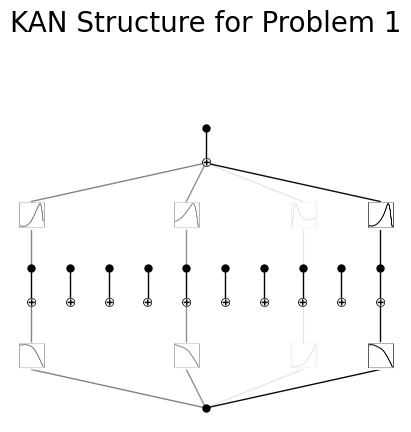

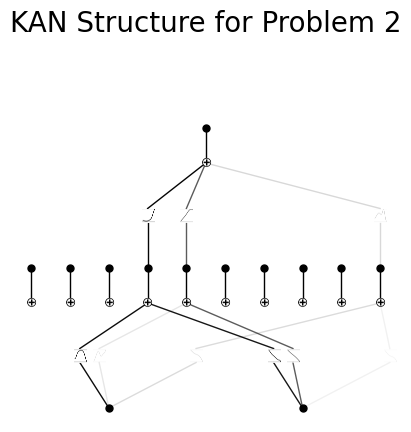

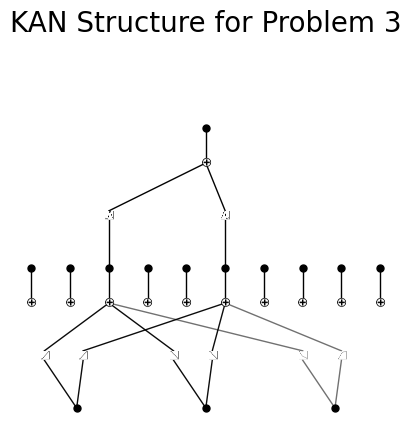

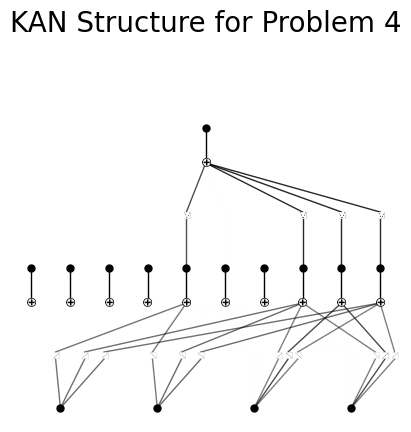

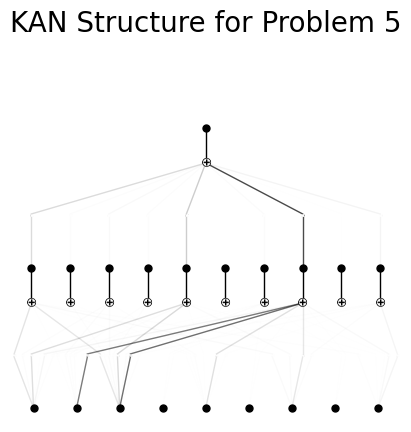

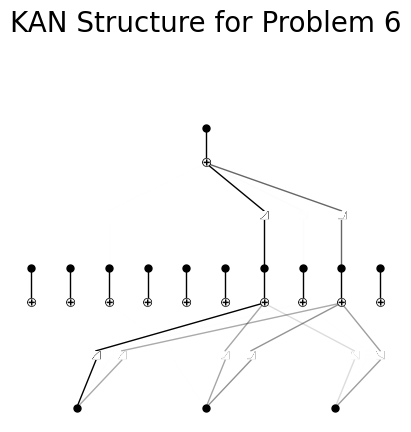

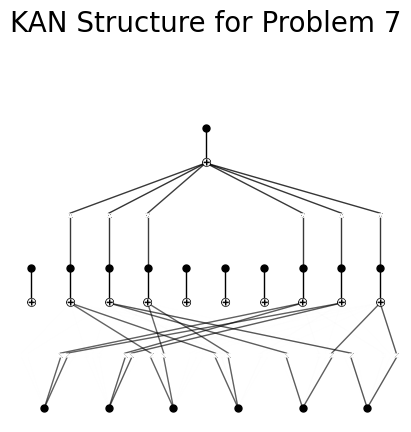

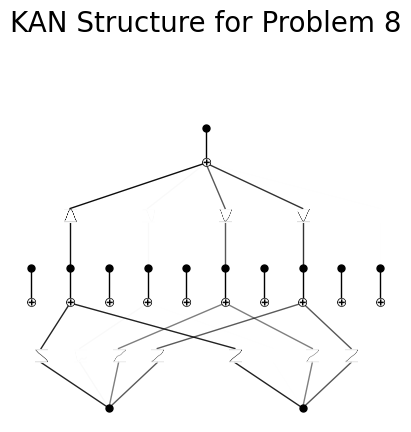

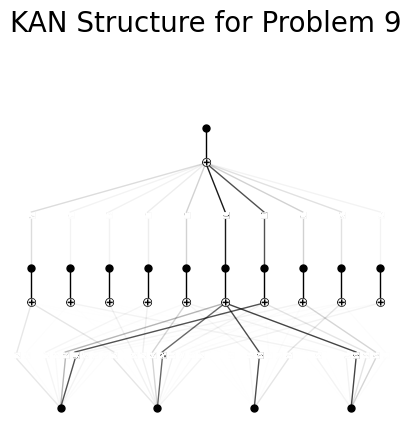

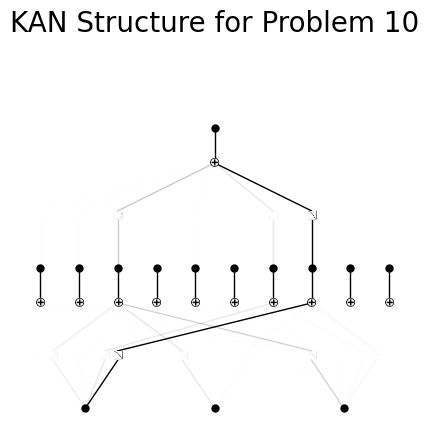

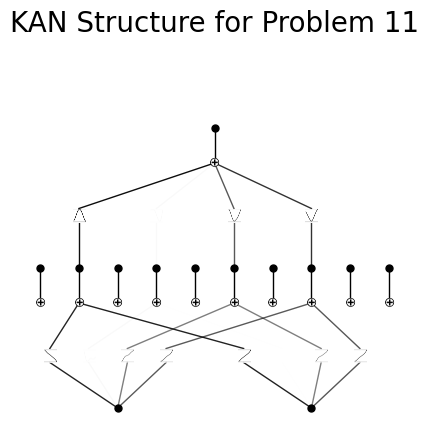

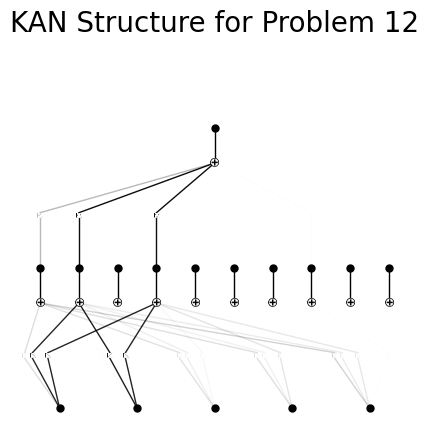

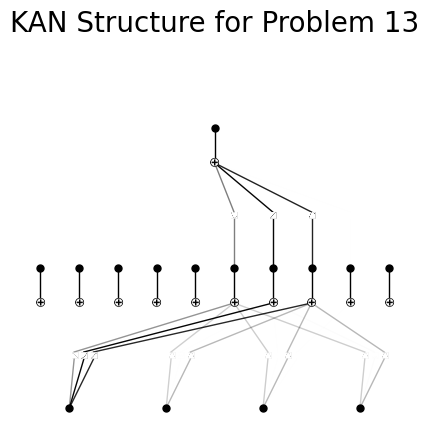

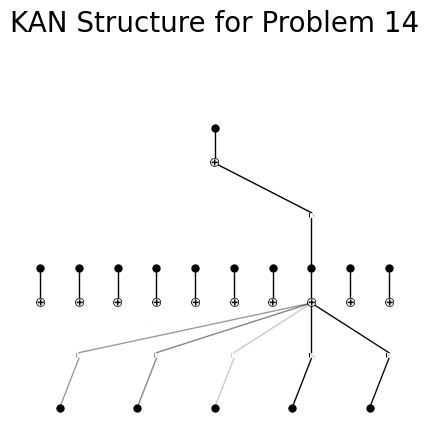

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.float64)
loss_fn = torch.nn.MSELoss()

kan_train_logs, kan_test_logs = [], []
mlp_train_logs, mlp_test_logs = [], []

print("\n>>> Feynman 方程拟合对比（自动遍历所有可用问题）")

for problem_id in range(1, 15):
    try:
        input_vars, expr, f, ranges = get_feynman_dataset(problem_id)
    except:
        continue

    print(f"\n=== Problem {problem_id} ===")
    print(f"表达式: {expr}")

    # 数据集
    n_var = len(input_vars)
    dataset = create_dataset(f, n_var=n_var, ranges=ranges, device=device)

    # === KAN ===
    model = KAN(width=[n_var, 10, 1], grid=5, k=3, seed=42, device=device)
    kan_train, kan_test = [], []
    for _ in range(15):
        model.fit(dataset, opt="LBFGS", steps=1, lamb=1e-3)
        with torch.no_grad():
            pred_train = model(dataset['train_input'])
            pred_test = model(dataset['test_input'])
            kan_train.append(loss_fn(pred_train, dataset['train_label']).item())
            kan_test.append(loss_fn(pred_test, dataset['test_label']).item())
    model.plot(title=f"KAN Structure for Problem {problem_id}")
    kan_train_logs.append(kan_train)
    kan_test_logs.append(kan_test)

    # === MLP ===
    mlp = MLP(width=[n_var, 10, 1]).to(device)
    opt = torch.optim.LBFGS(mlp.parameters(), lr=1.0, max_iter=1)

    mlp_train, mlp_test = [], []
    for _ in range(15):
        def closure():
            opt.zero_grad()
            pred = mlp(dataset['train_input'])
            loss = loss_fn(pred, dataset['train_label'])
            loss.backward()
            return loss
        try:
            opt.step(closure)
            with torch.no_grad():
                pred_train = mlp(dataset['train_input'])
                pred_test = mlp(dataset['test_input'])
                mlp_train.append(loss_fn(pred_train, dataset['train_label']).item())
                mlp_test.append(loss_fn(pred_test, dataset['test_label']).item())
        except:
            mlp_train.append(float('inf'))
            mlp_test.append(float('inf'))

    mlp_train_logs.append(mlp_train)
    mlp_test_logs.append(mlp_test)

    print(f"KAN RMSE: {kan_test[-1]:.4f} | MLP RMSE: {mlp_test[-1]:.4f}")

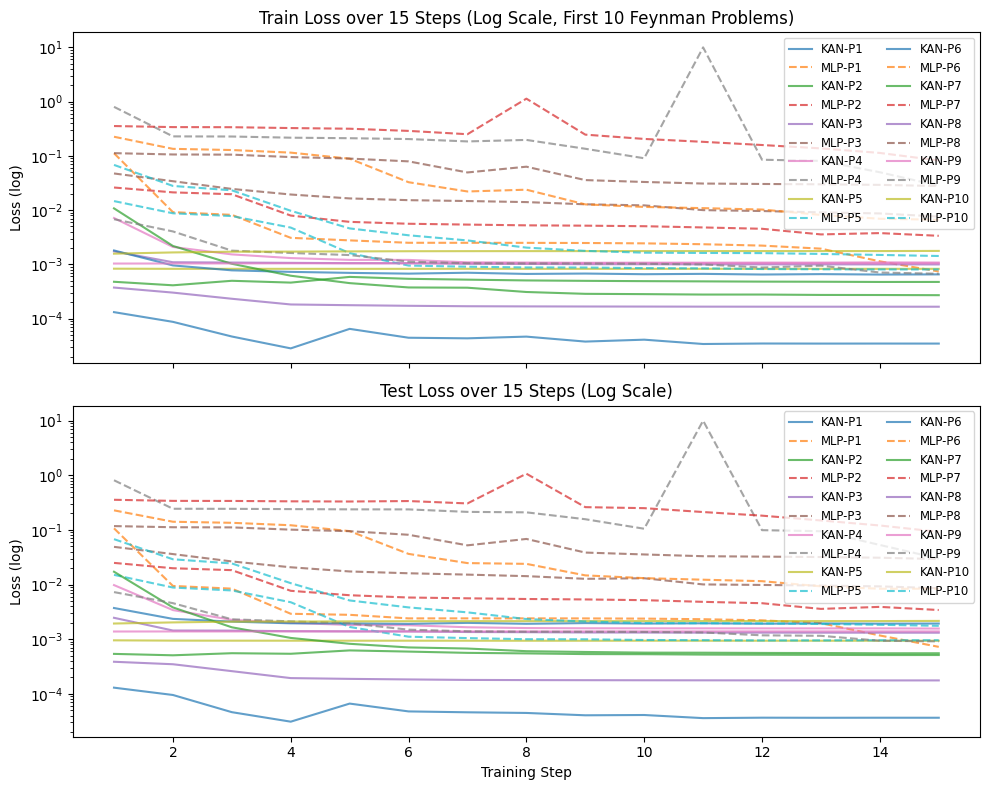

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# === 裁剪异常 loss（避免 MLP 某些爆炸情况）===
def clip_losses(logs, max_value=10.0):
    return [[min(loss, max_value) for loss in curve] for curve in logs]

kan_train_logs_clipped = clip_losses(kan_train_logs)
kan_test_logs_clipped = clip_losses(kan_test_logs)
mlp_train_logs_clipped = clip_losses(mlp_train_logs)
mlp_test_logs_clipped = clip_losses(mlp_test_logs)

# === 绘图：前10个 problem 的 loss 曲线 ===
steps = list(range(1, 16))
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

for i in range(min(10, len(kan_train_logs_clipped))):
    axs[0].plot(steps, kan_train_logs_clipped[i], label=f"KAN-P{i+1}", linestyle="-", alpha=0.7)
    axs[0].plot(steps, mlp_train_logs_clipped[i], label=f"MLP-P{i+1}", linestyle="--", alpha=0.7)
    axs[1].plot(steps, kan_test_logs_clipped[i], label=f"KAN-P{i+1}", linestyle="-", alpha=0.7)
    axs[1].plot(steps, mlp_test_logs_clipped[i], label=f"MLP-P{i+1}", linestyle="--", alpha=0.7)

# 设置对数坐标
axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].set_title("Train Loss over 15 Steps (Log Scale, First 10 Feynman Problems)")
axs[1].set_title("Test Loss over 15 Steps (Log Scale)")
axs[1].set_xlabel("Training Step")
axs[0].set_ylabel("Loss (log)")
axs[1].set_ylabel("Loss (log)")
axs[0].legend(ncol=2, fontsize="small", loc="upper right")
axs[1].legend(ncol=2, fontsize="small", loc="upper right")
plt.tight_layout()
plt.show()


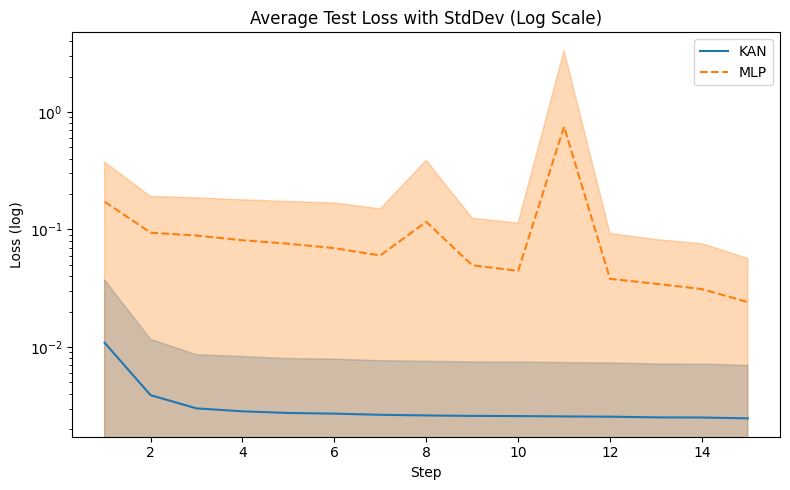

In [9]:
kan_mean = np.mean(kan_test_logs_clipped, axis=0)
kan_std = np.std(kan_test_logs_clipped, axis=0)
mlp_mean = np.mean(mlp_test_logs_clipped, axis=0)
mlp_std = np.std(mlp_test_logs_clipped, axis=0)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(steps, kan_mean, label='KAN', color='tab:blue')
ax.fill_between(steps, kan_mean-kan_std, kan_mean+kan_std, color='tab:blue', alpha=0.3)
ax.plot(steps, mlp_mean, label='MLP', color='tab:orange', linestyle='--')
ax.fill_between(steps, mlp_mean-mlp_std, mlp_mean+mlp_std, color='tab:orange', alpha=0.3)

ax.set_yscale('log')
ax.set_title("Average Test Loss with StdDev (Log Scale)")
ax.set_xlabel("Step")
ax.set_ylabel("Loss (log)")
ax.legend()
plt.tight_layout()
plt.show()


*EX3:grid*

In [1]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device, train_num=1000)


grids = np.array([3,5,10,20,50,100])
steps = 50
train_losses = np.zeros((len(grids), steps))
test_losses = np.zeros((len(grids), steps))
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,5,1], grid=grids[i], k=k, seed=0, device=device)
    else:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses[i] = np.array(results['train_loss'])
    test_losses[i] = np.array(results['test_loss'])

c:\ProgramData\anaconda3\envs\pykan-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.86e-03 | test_loss: 3.98e-03 | reg: 1.56e+01 | : 100%|█| 50/50 [00:10<00:00,  4.79it


saving model version 0.1
saving model version 0.2


| train_loss: 1.40e-03 | test_loss: 1.46e-03 | reg: 1.54e+01 | : 100%|█| 50/50 [00:09<00:00,  5.16it


saving model version 0.3
saving model version 0.4


| train_loss: 2.64e-04 | test_loss: 2.93e-04 | reg: 1.52e+01 | : 100%|█| 50/50 [00:09<00:00,  5.35it


saving model version 0.5
saving model version 0.6


| train_loss: 1.25e-04 | test_loss: 1.56e-04 | reg: 1.52e+01 | : 100%|█| 50/50 [00:09<00:00,  5.34it


saving model version 0.7
saving model version 0.8


| train_loss: 8.73e-05 | test_loss: 1.80e-04 | reg: 1.52e+01 | : 100%|█| 50/50 [00:07<00:00,  7.14it


saving model version 0.9
saving model version 0.10


| train_loss: 4.27e-05 | test_loss: 2.85e-04 | reg: 1.52e+01 | : 100%|█| 50/50 [00:08<00:00,  5.60it

saving model version 0.11


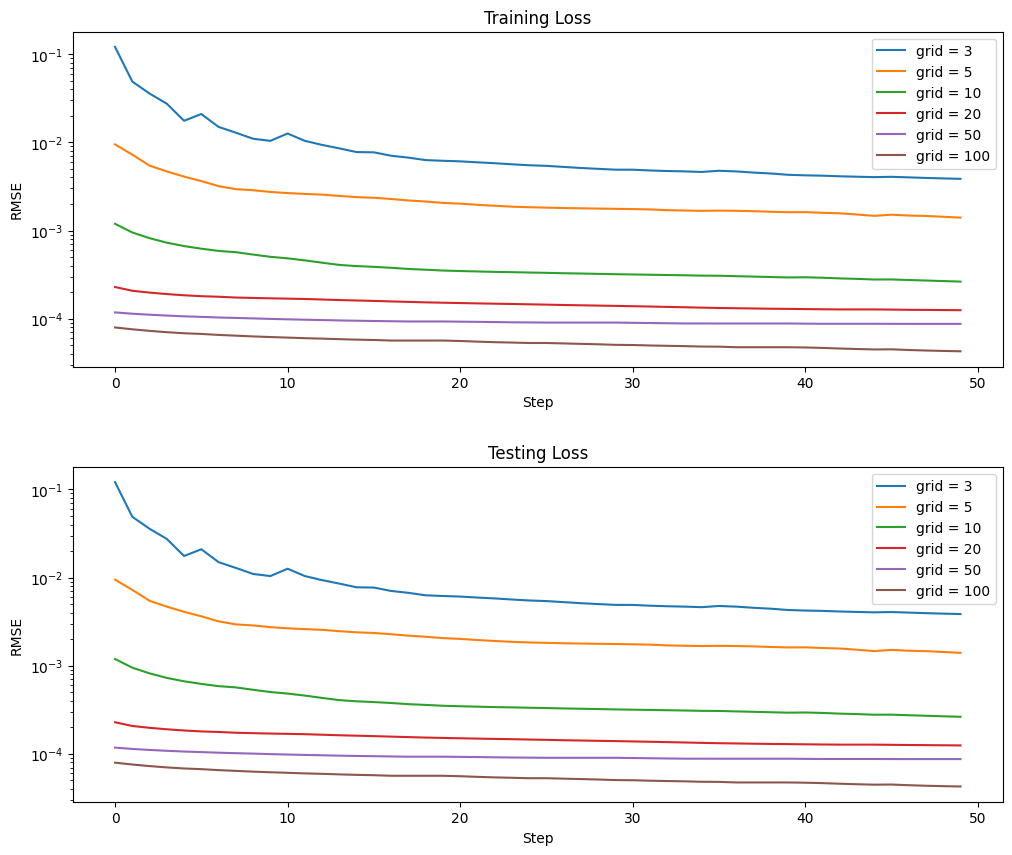

In [2]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
for i in range(len(grids)):
    plt.plot(train_losses[i], label='grid = {}'.format(grids[i]))
plt.legend()
plt.title('Training Loss')
plt.xlabel('Step')
plt.ylabel('RMSE')
plt.yscale('log')

plt.subplot(2, 1, 2)
for i in range(len(grids)):
    plt.plot(train_losses[i], label='grid = {}'.format(grids[i]))
plt.legend()
plt.title('Testing Loss')
plt.ylabel('RMSE')
plt.xlabel('Step')
plt.yscale('log')

plt.subplots_adjust(hspace=0.3)
plt.show()

*EX4:k*

cuda
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.24e-01 | test_loss: 8.01e-01 | reg: 7.52e+00 | : 100%|█| 10/10 [00:02<00:00,  4.60it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.85e-01 | test_loss: 6.51e-01 | reg: 7.26e+00 | : 100%|█| 10/10 [00:01<00:00,  5.00it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.49e-02 | test_loss: 3.92e-02 | reg: 7.73e+00 | : 100%|█| 10/10 [00:02<00:00,  4.55it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.58e-01 | test_loss: 5.28e-01 | reg: 8.17e+00 | : 100%|█| 10/10 [00:02<00:00,  4.76it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.77e-01 | test_loss: 5.36e-01 | reg: 8.04e+00 | : 100%|█| 10/10 [00:02<00:00,  4.32it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.50e-01 | test_loss: 5.07e-01 | reg: 7.87e+00 | : 100%|█| 10/10 [00:02<00:00,  3.97it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.68e-01 | test_loss: 5.35e-01 | reg: 7.86e+00 | : 100%|█| 10/10 [00:02<00:00,  3.90it


saving model version 0.1


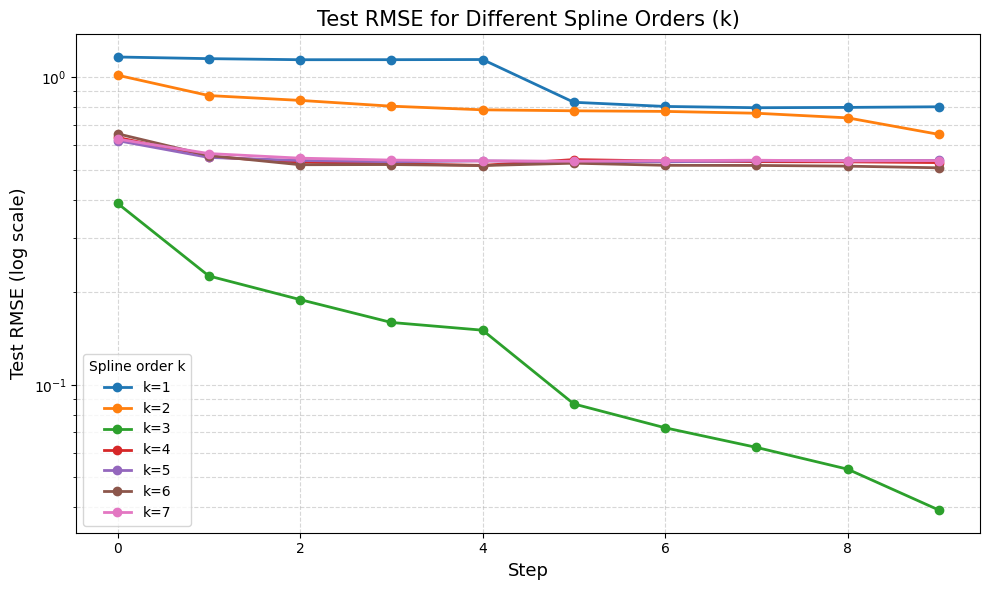

In [10]:
from kan import *
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi * x[:, [0]]) + x[:, [1]] ** 2)
dataset = create_dataset(f, n_var=2, device=device, train_num=1000)

ks = np.array([1, 2, 3, 4, 5, 6, 7])
steps = 10
grid = 10

train_losses_all = []
test_losses_all = []

for k in ks:
    model = KAN(width=[2, 1, 1], grid=grid, k=k, seed=0, device=device)
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses_all.append(results['train_loss'])
    test_losses_all.append(results['test_loss'])

# Plotting
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap("tab10")

for i, k in enumerate(ks):
    plt.plot(test_losses_all[i], label=f'k={k}', color=cmap(i), marker='o', linewidth=2)

plt.yscale('log')
plt.xlabel('Step', fontsize=13)
plt.ylabel('Test RMSE (log scale)', fontsize=13)
plt.title('Test RMSE for Different Spline Orders (k)', fontsize=15)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend(title='Spline order k', fontsize=10)
plt.tight_layout()
plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

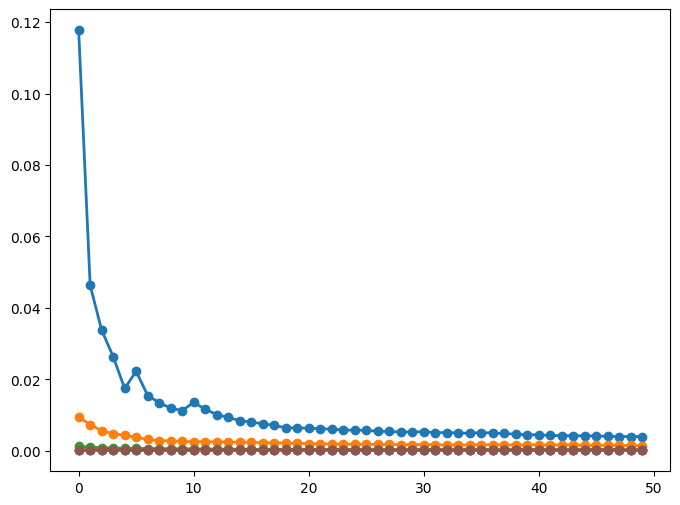

In [11]:
plt.figure(figsize=(8, 6))
cmap = plt.get_cmap("tab10")  # or "viridis", "plasma", etc.

for i, k in enumerate(ks):
    plt.plot(test_losses[i], label=f'k={k}', color=cmap(i), marker='o', linewidth=2)

plt.yscale('log')
plt.xlabel('Step', fontsize=13)
plt.ylabel('Test RMSE (log scale)', fontsize=13)
plt.title('Test RMSE for Different Spline Orders (k)', fontsize=15)
plt.legend(title='Spline order k', fontsize=10)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()